In [2]:
import numpy as np
import matplotlib.pyplot as plt
from cogwheel import gw_plotting
from pathlib import Path
import pandas as pd

import sys

sys.path.append("/Users/jonatahm/Work/GW/dot-pe-future/")

from cogwheel import gw_utils
from dot_pe.zoom import zoom, conditional_sampling
from dot_pe.utils import load_intrinsic_samples_from_rundir
from cogwheel.utils import exp_normalize


In [8]:
zoomer = zoom.Zoomer.from_json("zoom/iter3/run_0/Zoomer.json")
print(zoomer.mean)
print("\n",zoomer.cov)

[30.98883685 -0.73514915  0.62297589]

 [[0.79138942 0.07515667 0.06810121]
 [0.07515667 0.0268728  0.00919357]
 [0.06810121 0.00919357 0.00754234]]


In [9]:
bank = pd.read_feather("zoom/iter3/bank/intrinsic_sample_bank.feather")

In [13]:
bank["mchirp"] = gw_utils.m1m2_to_mchirp(*bank[["m1", "m2"]].values.T)
bank["lnq"] = np.log(np.divide(*bank[["m2", "m1"]].values.T))
bank["chieff"] = gw_utils.chieff(*bank[["m1", "m2", "s1z", "s2z"]].values.T)


In [ ]:
distances = np.einsum("ij,jk,ki->i", deltas, np.linalg.inv(zoomer.cov), deltas.T)
plt.scatter(distances, bank["log_prior_weights"], s=1, alpha=0.1)

(array([ 0.73515449,  1.3367155 ,  1.77678921,  2.09924562,
         1.95365293,  3.31652131,  2.40111334,  4.05091102,
         1.23440405, 10.75886319]),
 array([4.10246411e-03, 2.07581934e+00, 4.14753621e+00,
        6.21925309e+00, 8.29096996e+00, 1.03626868e+01,
        1.24344037e+01, 1.45061206e+01, 1.65778375e+01,
        1.86495543e+01, 2.07212712e+01]),
 [<matplotlib.patches.Polygon at 0x32fccead0>])

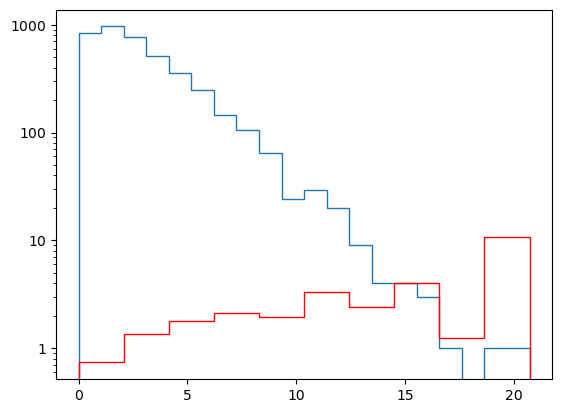

In [33]:
plt.hist(distances, log=True, bins=20, histtype="step")
plt.hist(
    distances,
    log=True,
    weights=np.exp(bank["log_prior_weights"]),
    histtype="step",
    color="r",
)

In [35]:
bank["weights"] = np.exp(bank["log_prior_weights"] - bank["log_prior_weights"].max())
bank["weights"] = bank["weights"] / bank["weights"].sum()
print((bank["weights"] ** 2).sum() ** (-1))

12.164052196195541


In [48]:
int_samples = load_intrinsic_samples_from_rundir("zoom/iter3/run_0/")
print(int_samples["weights"].sum())

print(len(int_samples))
print(f"Using bank of size {len(bank)}")
print(
    f"Accepted {len(np.load('zoom/iter3/run_0/intrinsic_samples.npz')['inds'])} (Incoherently)"
)
print(f"After likelihood: n_effective {(int_samples['weights'] ** 2).sum() ** -1}")

print(f"Efficiency: {((int_samples['weights'] ** 2).sum() ** -1)/len(bank)}")

0.9999999999999999
1821
Using bank of size 4096
Accepted 2882 (Incoherently)
After likelihood: n_effective 138.51209164576767
Efficiency: 0.033816428624455


zoom/iter3
[30.98883685 -0.73514915  0.62297589]

 [[0.79138942 0.07515667 0.06810121]
 [0.07515667 0.0268728  0.00919357]
 [0.06810121 0.00919357 0.00754234]]
Using bank of size 4096
Accepted 2882 (Incoherently)
After posterior: n_effective (intrinsic) 138.51
Efficiency: 0.0338


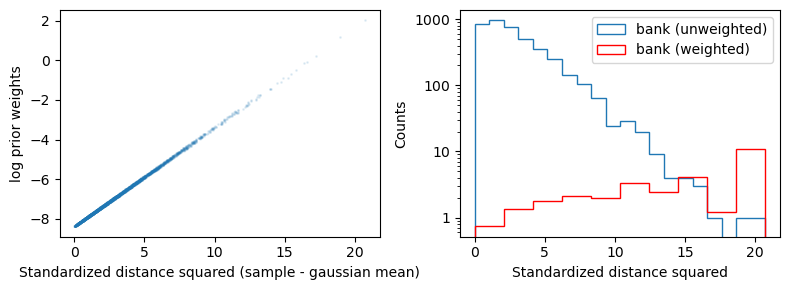

In [67]:
iter_dir = Path("zoom/iter3")
print(iter_dir)
zoomer = zoom.Zoomer.from_json(iter_dir / "run_0/Zoomer.json")
print(zoomer.mean)
print("\n", zoomer.cov)

bank = pd.read_feather(iter_dir / "bank/intrinsic_sample_bank.feather")
bank["mchirp"] = gw_utils.m1m2_to_mchirp(*bank[["m1", "m2"]].values.T)
bank["lnq"] = np.log(np.divide(*bank[["m2", "m1"]].values.T))
bank["chieff"] = gw_utils.chieff(*bank[["m1", "m2", "s1z", "s2z"]].values.T)
deltas = bank[["mchirp", "lnq", "chieff"]].values - zoomer.mean[None, :]
distances = np.einsum("ij,jk,ki->i", deltas, np.linalg.inv(zoomer.cov), deltas.T)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))

axes[0].scatter(distances, bank["log_prior_weights"], s=1, alpha=0.1)
axes[0].set_xlabel("Standardized distance squared (sample - gaussian mean)")
axes[0].set_ylabel("log prior weights")
axes[1].hist(distances, log=True, bins=20, histtype="step", label="bank (unweighted)")

axes[1].hist(
    distances,
    log=True,
    weights=np.exp(bank["log_prior_weights"]),
    histtype="step",
    color="r",
    label="bank (weighted)",
)
axes[1].legend()
axes[1].set_xlabel("Standardized distance squared")
axes[1].set_ylabel("Counts")
fig.tight_layout()
int_samples = load_intrinsic_samples_from_rundir(iter_dir / "run_0")
print(f"Using bank of size {len(bank)}")
print(
    f"Accepted {len(np.load(iter_dir / 'run_0/intrinsic_samples.npz')['inds'])} (Incoherently)"
)
print(f"After posterior: n_effective (intrinsic) {(int_samples['weights'] ** 2).sum() ** -1:.5g}")

print(f"Efficiency: {((int_samples['weights'] ** 2).sum() ** -1) / len(bank):.3g}")

zoom/iter4
[30.93393136 -0.74149957  0.62270913]

 [[0.53356947 0.04483445 0.04893205]
 [0.04483445 0.02890768 0.00782803]
 [0.04893205 0.00782803 0.00627409]]
Using bank of size 4096
Accepted 2872 (Incoherently)
After posterior: n_effective (intrinsic) 148.07
Efficiency: 0.0362


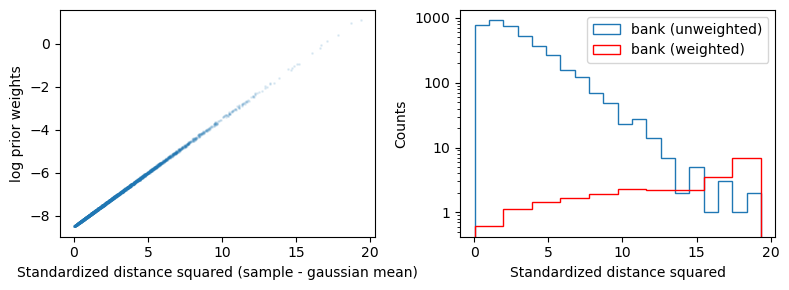

In [66]:
iter_dir = Path("zoom/iter4")
print(iter_dir)
zoomer = zoom.Zoomer.from_json(iter_dir / "run_0/Zoomer.json")
print(zoomer.mean)
print("\n", zoomer.cov)

bank = pd.read_feather(iter_dir / "bank/intrinsic_sample_bank.feather")
bank["mchirp"] = gw_utils.m1m2_to_mchirp(*bank[["m1", "m2"]].values.T)
bank["lnq"] = np.log(np.divide(*bank[["m2", "m1"]].values.T))
bank["chieff"] = gw_utils.chieff(*bank[["m1", "m2", "s1z", "s2z"]].values.T)
deltas = bank[["mchirp", "lnq", "chieff"]].values - zoomer.mean[None, :]
distances = np.einsum("ij,jk,ki->i", deltas, np.linalg.inv(zoomer.cov), deltas.T)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))

axes[0].scatter(distances, bank["log_prior_weights"], s=1, alpha=0.1)
axes[0].set_xlabel("Standardized distance squared (sample - gaussian mean)")
axes[0].set_ylabel("log prior weights")
axes[1].hist(distances, log=True, bins=20, histtype="step", label="bank (unweighted)")

axes[1].hist(
    distances,
    log=True,
    weights=np.exp(bank["log_prior_weights"]),
    histtype="step",
    color="r",
    label="bank (weighted)",
)
axes[1].legend()
axes[1].set_xlabel("Standardized distance squared")
axes[1].set_ylabel("Counts")
fig.tight_layout()
int_samples = load_intrinsic_samples_from_rundir(iter_dir / "run_0")
print(f"Using bank of size {len(bank)}")
print(
    f"Accepted {len(np.load(iter_dir / 'run_0/intrinsic_samples.npz')['inds'])} (Incoherently)"
)
print(f"After posterior: n_effective (intrinsic) {(int_samples['weights'] ** 2).sum() ** -1:.5g}")

print(f"Efficiency: {((int_samples['weights'] ** 2).sum() ** -1) / len(bank):.3g}")

In [2]:
orig_samples = pd.read_feather("inference_runs/toy_event/run_0/samples.feather")
zoomed_samples = pd.read_feather("zoom/iter1/run_0/samples.feather")

In [3]:
infernece_samples = load_intrinsic_samples_from_rundir(
    "inference_runs/toy_event/run_0/"
)
zoom_samples = load_intrinsic_samples_from_rundir("zoom/iter1/run_0")

zoom_inference_samples = load_intrinsic_samples_from_rundir("zoom/full_inference/run_0")

In [10]:
original_bank = pd.read_feather("bank/intrinsic_sample_bank.feather")
original_bank["weights"] = exp_normalize(original_bank["log_prior_weights"].values)
zoom_bank = pd.read_feather("zoom/iter1/bank/intrinsic_sample_bank.feather")
zoom_bank["weights"] = exp_normalize(zoom_bank["log_prior_weights"].values)

zoom_big_bank = pd.read_feather(
    "zoom/full_inference/bank/intrinsic_sample_bank.feather"
)
zoom_big_bank["weights"] = exp_normalize(zoom_big_bank["log_prior_weights"].values)

for df in [zoom_bank, original_bank, zoom_big_bank]:
    df["mchirp"] = gw_utils.m1m2_to_mchirp(df["m1"], df["m2"])
    df["lnq"] = np.log(df["m2"] / df["m1"])
    df["chieff"] = gw_utils.chieff(*df[["m1", "m2", "s1z", "s2z"]].values.T)

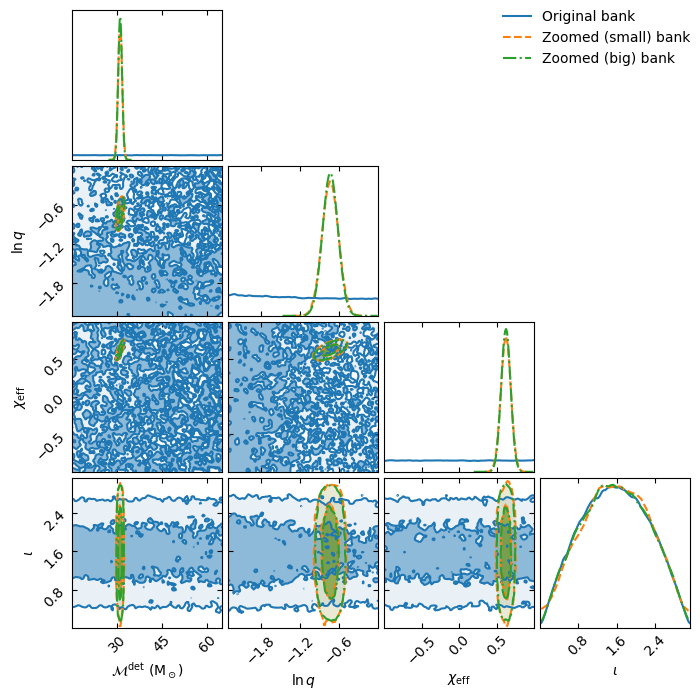

In [11]:
gw_plotting.MultiCornerPlot(
    [original_bank, zoom_bank, zoom_big_bank],
    params=[
        "mchirp",
        "lnq",
        "chieff",
        "iota",
    ],
    labels=["Original bank", "Zoomed (small) bank", "Zoomed (big) bank"],
    smooth=1,
).plot()

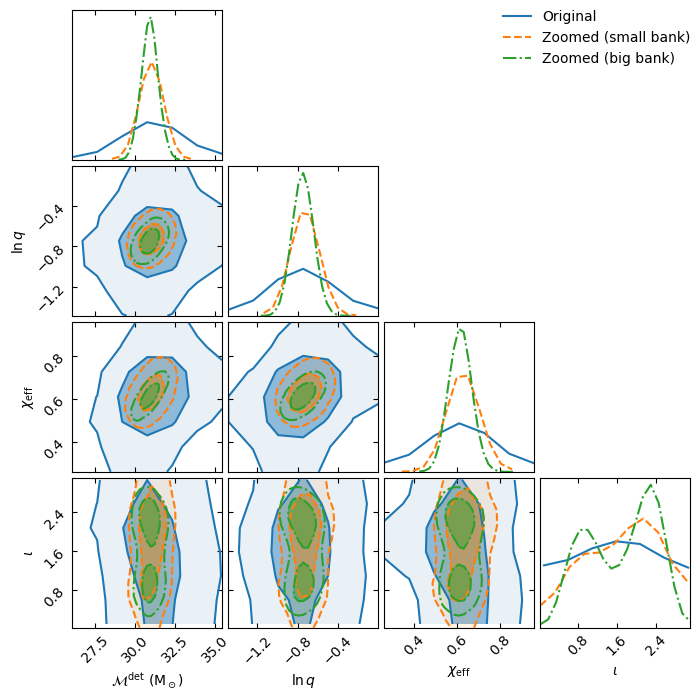

In [4]:
gw_plotting.MultiCornerPlot(
    [infernece_samples, zoom_samples, zoom_inference_samples],
    params=[
        "mchirp",
        "lnq",
        "chieff",
        "iota",
    ],
    labels=["Original", "Zoomed (small bank)", "Zoomed (big bank)"],
    smooth=1,
).plot()

In [ ]:
import numpy as np


def dkl_pq(xs, logp, logq):
    """
    Estimate D_KL(P||Q) = E_P[log p(X) - log q(X)]
    xs : (n, d) samples drawn from P
    logp, logq : callables returning log-pdf for a batch of points
                 signatures: logp(xs)->(n,), logq(xs)->(n,)
    """
    lp = logp(xs)
    lq = logq(xs)
    diff = lp - lq
    # guard against -inf/NaN if outside support, etc.
    mask = np.isfinite(diff)
    if not np.all(mask):
        diff = diff[mask]
    dkl = diff.mean()
    # optional standard error of the Monte Carlo estimate
    se = diff.std(ddof=1) / np.sqrt(len(diff))
    return float(dkl), float(se)


# Symmetric version (report both directions)
def dkl_both(xs_p, xs_q, logp, logq):
    dkl_pq_val, se_pq = dkl_pq(xs_p, logp, logq)
    dkl_qp_val, se_qp = dkl_pq(xs_q, logq, logp)
    return (dkl_pq_val, se_pq), (dkl_qp_val, se_qp)

In [81]:
import numpy as np
from numpy import log, exp
from numpy.random import default_rng


def hellinger_distance(xs, ys, logp, logq):
    """
    Estimate Hellinger distance H = sqrt(1 - BC),
    where BC = E_m[ 2*sqrt(p q)/(p+q) ] and m = 0.5(p+q).
    Handles unequal sample sizes by weighting sources equally.
    """
    # P-samples
    lp_x, lq_x = logp(xs), logq(xs)
    logden_x = np.logaddexp(lp_x, lq_x)
    w_x = np.exp(np.log(2.0) + 0.5 * (lp_x + lq_x) - logden_x)
    bc_x = np.mean(w_x[np.isfinite(w_x)])

    # Q-samples
    lp_y, lq_y = logp(ys), logq(ys)
    logden_y = np.logaddexp(lp_y, lq_y)
    w_y = np.exp(np.log(2.0) + 0.5 * (lp_y + lq_y) - logden_y)
    bc_y = np.mean(w_y[np.isfinite(w_y)])

    # Equal-mixture weighting
    BC = 0.5 * (bc_x + bc_y)
    BC = float(np.clip(BC, 0.0, 1.0))
    return float(np.sqrt(1.0 - BC))

In [82]:
old_rundir = Path("zoom/iter3")
zoomer_old = zoom.Zoomer.from_json(old_rundir / "run_0/Zoomer.json")

bank_old = pd.read_feather(iter_dir / "bank/intrinsic_sample_bank.feather")
bank_old["mchirp"] = gw_utils.m1m2_to_mchirp(*bank_old[["m1", "m2"]].values.T)
bank_old["lnq"] = np.log(np.divide(*bank_old[["m2", "m1"]].values.T))
bank_old["chieff"] = gw_utils.chieff(*bank_old[["m1", "m2", "s1z", "s2z"]].values.T)
xs_old = bank_old[["mchirp", "lnq", "chieff"]].values

new_rundir = Path("zoom/iter4")
zoomer_new = zoom.Zoomer.from_json(new_rundir / "run_0/Zoomer.json")

bank_new = pd.read_feather(iter_dir / "bank/intrinsic_sample_bank.feather")
bank_new["mchirp"] = gw_utils.m1m2_to_mchirp(*bank_new[["m1", "m2"]].values.T)
bank_new["lnq"] = np.log(np.divide(*bank_new[["m2", "m1"]].values.T))
bank_new["chieff"] = gw_utils.chieff(*bank_new[["m1", "m2", "s1z", "s2z"]].values.T)
xs_new = bank_new[["mchirp", "lnq", "chieff"]].values


In [79]:
dkl_both(xs_old, xs_new, zoomer_old.distribution.logpdf, zoomer_new.distribution.logpdf)

((0.0919154506709142, 0.007624124951603375),
 (-0.0919154506709142, 0.007624124951603375))

In [83]:
hellinger_distance(
    xs_old, xs_new, zoomer_old.distribution.logpdf, zoomer_new.distribution.logpdf
)

0.15779535120530483